In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('trans_snpcounts_gene_by_bin.csv', sep = '\t')
df

,Prefix,Baseline,000,001,010,011,100,101,110,111
0,ENSG00000011009,70,49,17,2,2,0,0,0,0
1,ENSG00000014123,1335,1164,163,5,2,1,0,0,0
2,ENSG00000017260,5,3,2,0,0,0,0,0,0
3,ENSG00000021826,89,79,10,0,0,0,0,0,0
4,ENSG00000049247,61,53,7,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
353,ENSG00000261000,105,85,16,4,0,0,0,0,0
354,ENSG00000261659,94,76,15,2,0,1,0,0,0
355,ENSG00000261670,43,37,6,0,0,0,0,0,0
356,ENSG00000261717,145,123,22,0,0,0,0,0,0


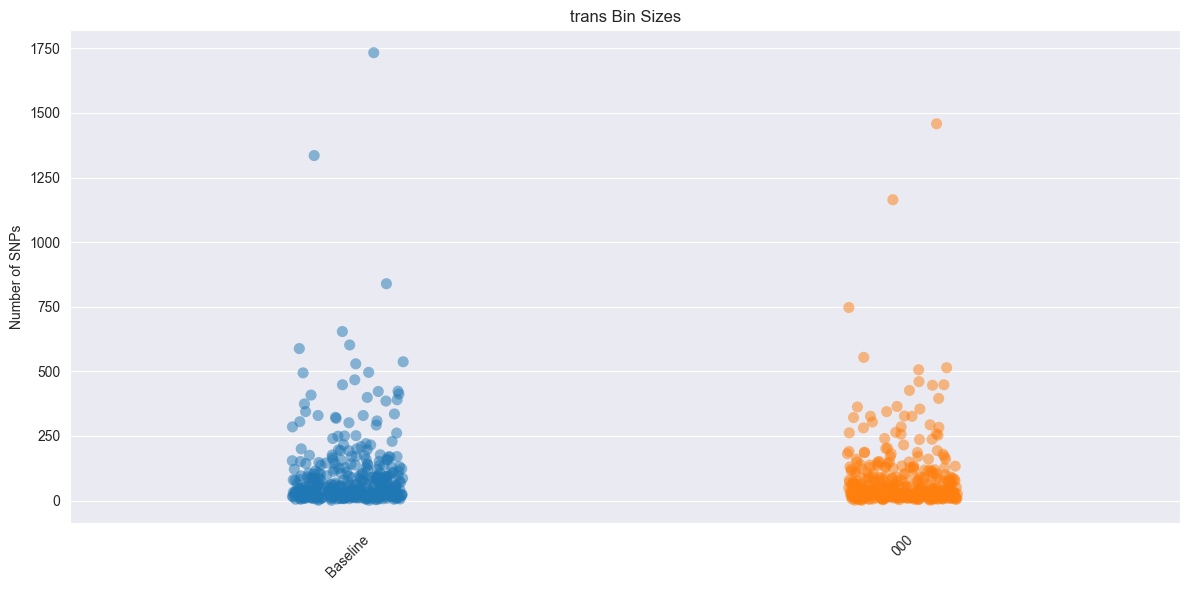

In [3]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df[['Baseline', '000']], 
              size=8, alpha=0.5)
plt.title('trans Bin Sizes')
plt.ylabel('Number of SNPs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('trans_snp_bins.png')
plt.show()

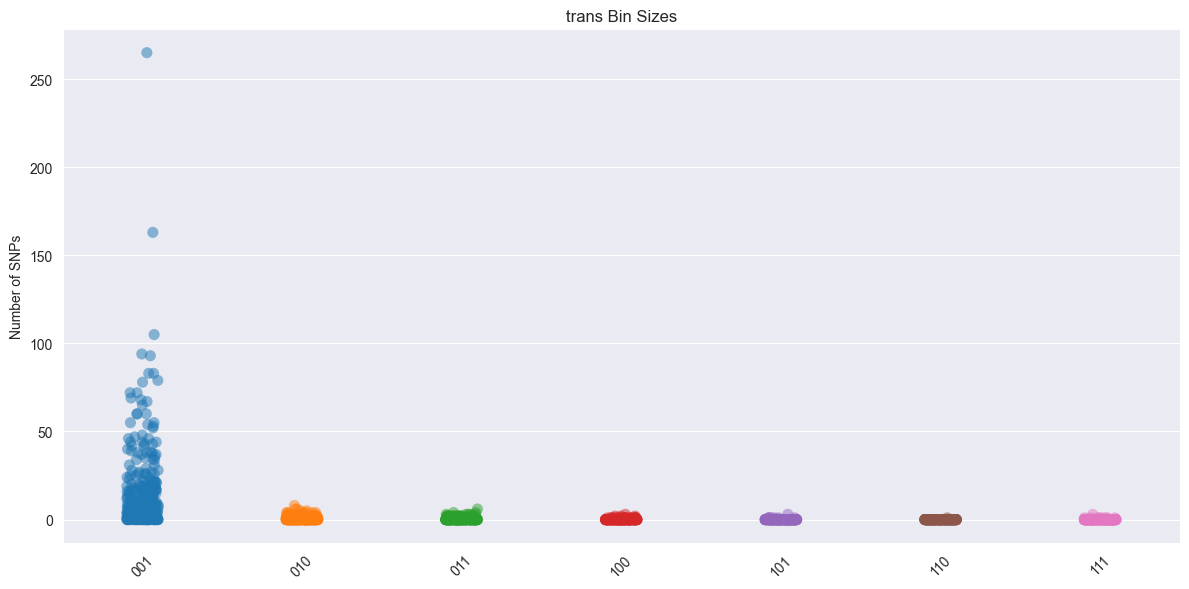

In [4]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df[['001','010', '011', '100', '101', '110', '111']], 
              size=8, alpha=0.5)
plt.title('trans Bin Sizes')
plt.ylabel('Number of SNPs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('trans_snp_bins_zoom.png')
plt.show()

In [5]:
def one_bin(row):
    count_nonzero = 0  # Counter for non-zero values
    for cond in ['000', '001', '010', '011', '100', '101', '110', '111']:
        if int(row[cond]) != 0:
            count_nonzero += 1
    
    # If exactly one non-zero value found, return the Prefix
    if count_nonzero == 1:
        return row['Prefix']
    else:
        return np.nan

one_bin_genes = df.apply(one_bin, axis = 1)
one_bin_genes = one_bin_genes[~pd.isna(one_bin_genes)]

In [6]:
one_bin_genes

10     ENSG00000075240
12     ENSG00000085185
21     ENSG00000100916
32     ENSG00000111644
50     ENSG00000123395
67     ENSG00000134864
71     ENSG00000135747
85     ENSG00000139636
91     ENSG00000143612
95     ENSG00000145365
96     ENSG00000145604
98     ENSG00000147164
107    ENSG00000152931
116    ENSG00000158623
125    ENSG00000163584
137    ENSG00000166922
149    ENSG00000172183
152    ENSG00000172888
154    ENSG00000174514
160    ENSG00000177602
174    ENSG00000184378
191    ENSG00000196233
198    ENSG00000198632
199    ENSG00000200182
203    ENSG00000204628
221    ENSG00000216917
223    ENSG00000217929
224    ENSG00000218027
237    ENSG00000225976
239    ENSG00000226099
251    ENSG00000228125
253    ENSG00000228184
254    ENSG00000228449
260    ENSG00000230221
270    ENSG00000232713
273    ENSG00000233144
296    ENSG00000239872
298    ENSG00000240890
299    ENSG00000240996
322    ENSG00000250162
325    ENSG00000251297
331    ENSG00000256898
347    ENSG00000259909
dtype: obje

In [7]:
f = open('one_bin_genes.txt', 'w')
for gene in one_bin_genes:
    print(gene)
    f.write(gene + '\n')

ENSG00000075240
ENSG00000085185
ENSG00000100916
ENSG00000111644
ENSG00000123395
ENSG00000134864
ENSG00000135747
ENSG00000139636
ENSG00000143612
ENSG00000145365
ENSG00000145604
ENSG00000147164
ENSG00000152931
ENSG00000158623
ENSG00000163584
ENSG00000166922
ENSG00000172183
ENSG00000172888
ENSG00000174514
ENSG00000177602
ENSG00000184378
ENSG00000196233
ENSG00000198632
ENSG00000200182
ENSG00000204628
ENSG00000216917
ENSG00000217929
ENSG00000218027
ENSG00000225976
ENSG00000226099
ENSG00000228125
ENSG00000228184
ENSG00000228449
ENSG00000230221
ENSG00000232713
ENSG00000233144
ENSG00000239872
ENSG00000240890
ENSG00000240996
ENSG00000250162
ENSG00000251297
ENSG00000256898
ENSG00000259909


| Column Name | Bit String | Enhancer (1st) | ATAC-seq (2nd) | Contact Domains (3rd) | Meaning |
|------------|------------|----------------|----------------|---------------------|---------|
| 000        | 000        | 0              | 0              | 0                   | No annotations found |
| 001        | 001        | 0              | 0              | 1                   | Only contact domains annotation |
| 010        | 010        | 0              | 1              | 0                   | Only ATAC-seq annotation |
| 011        | 011        | 0              | 1              | 1                   | ATAC-seq and contact domains annotations |
| 100        | 100        | 1              | 0              | 0                   | Only enhancer annotation |
| 101        | 101        | 1              | 0              | 1                   | Enhancer and contact domains annotations |
| 110        | 110        | 1              | 1              | 0                   | Enhancer and ATAC-seq annotations |
| 111        | 111        | 1              | 1              | 1                   | All annotations found |

In [8]:
df = pd.read_csv('cis_snpcounts_gene_by_bin.csv', sep = '\t')
df

,Prefix,Baseline,000,001,010,011,100,101,110,111
0,ENSG00000000419,257,251,0,6,0,0,0,0,0
1,ENSG00000000457,258,181,71,2,4,0,0,0,0
2,ENSG00000000460,345,266,72,3,4,0,0,0,0
3,ENSG00000000938,108,83,19,4,1,1,0,0,0
4,ENSG00000001036,325,322,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6729,ENSG00000257178,205,201,0,4,0,0,0,0,0
6730,ENSG00000257497,238,71,166,1,0,0,0,0,0
6731,ENSG00000257550,203,159,40,4,0,0,0,0,0
6732,ENSG00000257663,294,294,0,0,0,0,0,0,0


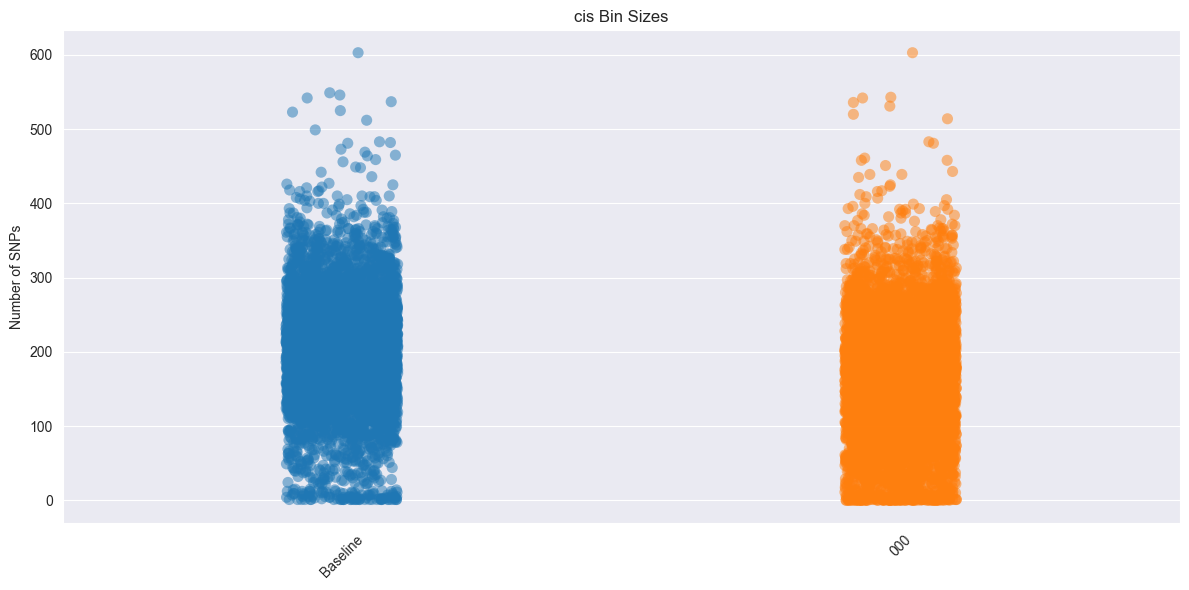

In [9]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df[['Baseline', '000']], 
              size=8, alpha=0.5)
plt.title('cis Bin Sizes')
plt.ylabel('Number of SNPs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('cis_snp_bins.png')
plt.show()

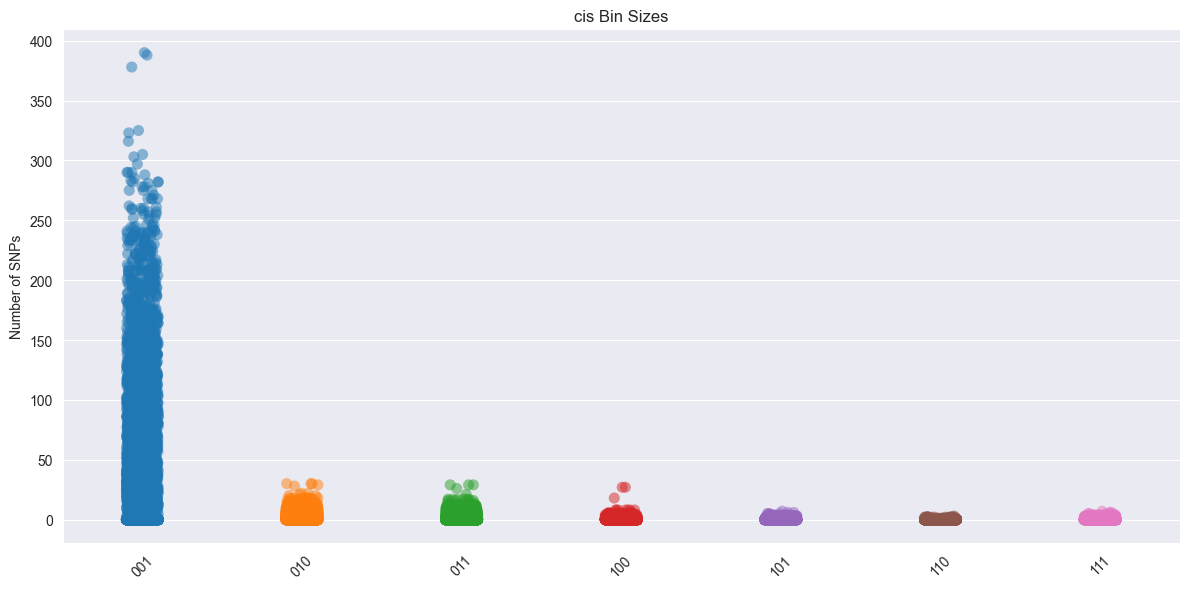

In [12]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df[['001','010', '011', '100', '101', '110', '111']], 
              size=8, alpha=0.5)
plt.title('cis Bin Sizes')
plt.ylabel('Number of SNPs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('cis_snp_bins_zoom.png')
plt.show()

In [11]:
def one_bin(row):
    count_nonzero = 0  # Counter for non-zero values
    for cond in ['000', '001', '010', '011', '100', '101', '110', '111']:
        if int(row[cond]) != 0:
            count_nonzero += 1
    
    # If exactly one non-zero value found, return the Prefix
    if count_nonzero == 1:
        return row['Prefix']
    else:
        return np.nan

one_bin_genes = df.apply(one_bin, axis = 1)
one_bin_genes = one_bin_genes[~pd.isna(one_bin_genes)]

f = open('cis_one_bin_genes.txt', 'w')
for gene in one_bin_genes:
    print(gene)
    f.write(gene + '\n')

ENSG00000001629
ENSG00000001631
ENSG00000003436
ENSG00000004139
ENSG00000004142
ENSG00000004864
ENSG00000005156
ENSG00000005483
ENSG00000005801
ENSG00000006075
ENSG00000006125
ENSG00000006652
ENSG00000007171
ENSG00000007341
ENSG00000007372
ENSG00000008283
ENSG00000008311
ENSG00000008394
ENSG00000008735
ENSG00000009830
ENSG00000009844
ENSG00000011295
ENSG00000011600
ENSG00000012504
ENSG00000014123
ENSG00000014257
ENSG00000015568
ENSG00000016391
ENSG00000018189
ENSG00000018607
ENSG00000019991
ENSG00000019995
ENSG00000021645
ENSG00000021826
ENSG00000022277
ENSG00000023318
ENSG00000024526
ENSG00000025708
ENSG00000025770
ENSG00000026652
ENSG00000029153
ENSG00000029639
ENSG00000030419
ENSG00000031003
ENSG00000031691
ENSG00000032219
ENSG00000037749
ENSG00000038002
ENSG00000038274
ENSG00000038427
ENSG00000040275
ENSG00000040341
ENSG00000040933
ENSG00000041515
ENSG00000042781
ENSG00000042832
ENSG00000043591
ENSG00000044459
ENSG00000046604
ENSG00000047249
ENSG00000048540
ENSG00000049167
ENSG0000